In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors



In [3]:
df = pd.read_csv(r"Stocks\MSFT\cleaned_data\MSFT_2019-01-03_34200000_57600000_orderbook_10.csv")
del df["Order_ID"]
del df["Event_Type"]
df["DateTime"] = pd.to_datetime(df["DateTime"], format='%Y-%m-%d %H:%M:%S:%f')
df.set_index(df["DateTime"], inplace=True)
del df["DateTime"]


Original length 2040060


C:\Users\dbjac\AppData\Local\Temp\ipykernel_28828\1880029482.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill
C:\Users\dbjac\AppData\Local\Temp\ipykernel_28828\1880029482.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in

,Size,Price,Direction,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,Ask_Price_Level_2,Ask_Volume_Level_2,Bid_Price_Level_2,...,Bid_Volume_Level_9,Ask_Price_Level_10,Ask_Volume_Level_10,Bid_Price_Level_10,Bid_Volume_Level_10,Mid,Spread,Return,Price_Direction,Target
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-03 10:00:00.000,105.914773,98.915920,-0.323864,98.935625,159.187500,98.866307,121.602273,98.951051,204.272727,98.853892,...,280.835227,99.036278,209.659091,98.759318,473.781250,98.900966,0.069318,0.000000,0.0,-1.0
2019-01-03 10:00:00.100,112.727273,98.841273,0.236364,98.902727,105.454545,98.831273,152.727273,98.915273,105.454545,98.821273,...,207.636364,99.006727,100.000000,98.730909,309.200000,98.867000,0.071455,-0.000755,-1.0,1.0
2019-01-03 10:00:00.200,100.823529,98.876588,-0.011765,98.925882,116.741176,98.847882,178.941176,98.936235,181.647059,98.836941,...,194.788235,99.017059,100.000000,98.744235,605.176471,98.886882,0.078000,0.000357,1.0,-1.0
2019-01-03 10:00:00.300,117.647059,98.825294,-0.058824,98.882941,135.294118,98.813529,147.058824,98.893529,164.705882,98.801765,...,102.647059,98.982353,100.000000,98.704706,928.764706,98.848235,0.069412,-0.000519,-1.0,-1.0
2019-01-03 10:00:00.400,168.750000,98.802500,0.750000,98.900000,300.000000,98.818750,287.500000,98.920000,100.000000,98.808750,...,150.000000,99.000000,100.000000,98.712500,103.750000,98.859375,0.081250,-0.000231,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-03 15:29:59.500,100.000000,97.848000,0.200000,97.860000,400.000000,97.840000,455.000000,97.870000,400.000000,97.830000,...,600.000000,97.950000,300.000000,97.750000,606.000000,97.850000,0.020000,0.000000,0.0,0.0
2019-01-03 15:29:59.600,100.428571,97.845429,0.028571,97.852000,357.142857,97.839714,193.285714,97.862000,597.142857,97.829714,...,597.314286,97.942000,380.000000,97.749714,511.542857,97.845857,0.012286,-0.000026,0.0,-1.0
2019-01-03 15:29:59.700,100.000000,97.780000,1.000000,97.850000,300.000000,97.840000,100.000000,97.860000,680.000000,97.830000,...,550.000000,97.940000,400.000000,97.750000,506.000000,97.845000,0.010000,-0.000669,-1.0,1.0


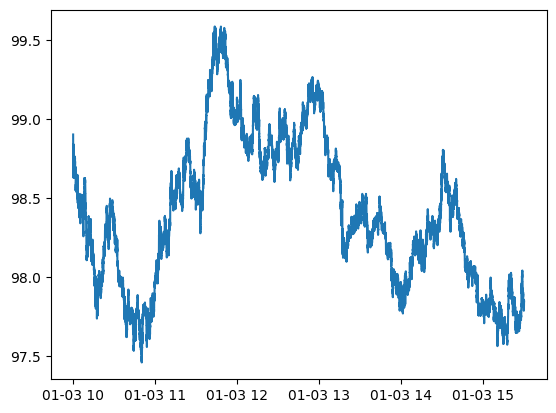

In [4]:
print("Original length",len(df))
df = df.between_time('10:00', '15:30')
df = df.resample("100ms").mean()
df = df.fillna(method='ffill')  # Forward fill
df["Price"] = df["Price"]/10000
df["Mid"] = (df["Ask_Price_Level_1"] + df["Bid_Price_Level_1"]) /2
df["Spread"] = df["Ask_Price_Level_1"] - df["Bid_Price_Level_1"]
df["Return"] = np.log(df["Price"]/df["Price"].shift(1))
df["Return"].iloc[0] = 0
df["Price_Direction"] = np.sign(df["Return"].round(4))
df["Target"] = np.sign(df["Return"].round(4)).shift(-1)
df["Target"].iloc[-1] = 0 
plt.plot(df["Mid"])
df


In [5]:

for i in range(1,11):
    df[f"Relative_Ask_Price_Level_{i}"] = (df[f"Ask_Price_Level_{i}"] - df["Mid"]) / df["Mid"]
    df[f"Relative_Bid_Price_Level_{i}"] = (df[f"Bid_Price_Level_{i}"] - df["Mid"]) / df["Mid"]
    df[f"Log_Ask_Volume_Level_{i}"] = np.log(1+df[f"Ask_Volume_Level_{i}"])
    df[f"Log_Bid_Volume_Level_{i}"] = np.log(1+df[f"Bid_Volume_Level_{i}"])



In [6]:
def create_image_updown_vol(t,lookback):
    
    height = 50
    width = 3 * lookback # lookback = 1s
    grid = np.zeros((height,width))
    width = width + 2
    origin = df.iloc[t]["Price"]
    max_vols = np.zeros(lookback)
    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        #print(row.name)
        w_offset = width-(3*w)-1
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        for i in range(1,11):
            ask_vol_i = row[f"Log_Ask_Volume_Level_{i}"]
            bid_vol_i = row[f"Log_Bid_Volume_Level_{i}"]
            fix = (h_offset+mid+(i-1))
            if fix >= height:
                fix = height - 1
            grid[(h_offset+mid-(i)),w_offset+1] = ask_vol_i
            grid[fix,w_offset-1] = bid_vol_i
            largest = max(ask_vol_i,bid_vol_i)
            current = max_vols.max()
            max_vols[w-1] = max(largest,current)
    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        w_offset = width-(3*w)-1
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
        grid[(h_offset+mid-10):(h_offset+mid+10),w_offset] = max_vols.max()
    return grid





In [7]:
def create_image_side_vol(t,lookback):
    
    height = 50
    width = 3 * lookback # lookback = 1s
    grid = np.zeros((height,width))
    width = width + 2
    origin = df.iloc[t]["Price"]
    max_vols = np.zeros(lookback)
    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        w_offset = width-(3*w)-1
        
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
       
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        for i in range(1,11):
            ask_vol_i = row[f"Log_Ask_Volume_Level_{i}"]
            bid_vol_i = row[f"Log_Bid_Volume_Level_{i}"]
            grid[(h_offset+int(np.floor(mid/2))-(i)),w_offset+1] = ask_vol_i
            grid[(h_offset+int(np.floor(mid/2))-(i-1)),w_offset-1] = bid_vol_i
            largest = max(ask_vol_i,bid_vol_i)
            current = max_vols.max()
            max_vols[w-1] = max(largest,current)

    return grid




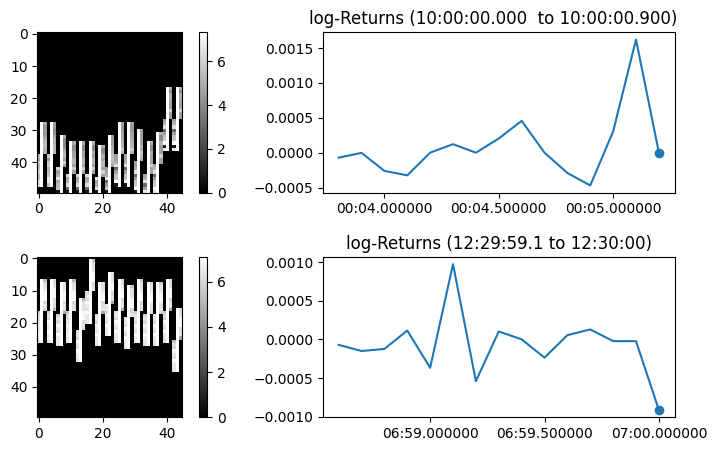

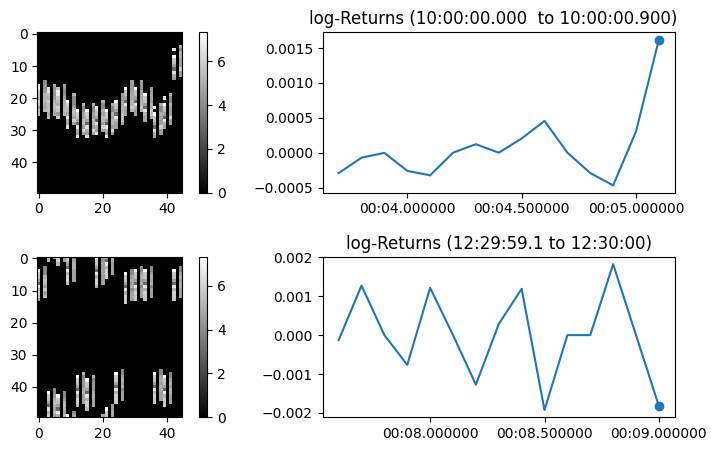

In [15]:
t = [10,23000]
lookback = 15

plt.figure(figsize=(10, 5))

plt.subplot(2,2,1)
t = 52
lookback = 15
grid= create_image_updown_vol(t,lookback)
plt.imshow(grid,cmap="gray",vmin=0)
plt.colorbar()
plt.subplot(2,2,2)
plt.plot(df["Return"][t+1-lookback:t+1])
plt.scatter(df.iloc[t].name,df.iloc[t]["Return"])
plt.title("log-Returns (10:00:00.000  to 10:00:00.900)  ")

plt.subplot(2,2,3)
t = 4200
grid= create_image_updown_vol(t,lookback)
plt.imshow(grid,cmap="gray",vmin=0)
plt.colorbar()
plt.subplot(2,2,4)
plt.plot(df["Return"][t+1-lookback:t+1])
plt.scatter(df.iloc[t].name,df.iloc[t]["Return"])
plt.title("log-Returns (12:29:59.1 to 12:30:00)")

plt.subplots_adjust(hspace=0.4)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
t = 51
lookback = 15
grid= create_image_side_vol(t,lookback)
plt.imshow(grid,cmap="gray",vmin=0)
plt.colorbar()
plt.subplot(2,2,2)
plt.plot(df["Return"][t+1-lookback:t+1])
plt.scatter(df.iloc[t].name,df.iloc[t]["Return"])
plt.title("log-Returns (10:00:00.000  to 10:00:00.900)  ")



plt.subplot(2,2,3)
t = 90
grid= create_image_side_vol(t,lookback)
plt.imshow(grid,cmap="gray",vmin=0)
plt.colorbar()
plt.subplot(2,2,4)
plt.plot(df["Return"][t+1-lookback:t+1])
plt.scatter(df.iloc[t].name,df.iloc[t]["Return"])
plt.title("log-Returns (12:29:59.1 to 12:30:00)")

plt.subplots_adjust(hspace=0.4)
plt.show()



In [9]:
def create_image_updown_price(t,lookback):
    
    height = 20
    width = lookback # lookback = 1s
    grid = np.zeros((height,width))
    width = width + 2
    origin = df.iloc[t]["Price"]
    max_vols = np.zeros(lookback)

    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        w_offset = w-1
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
        grid[mid,w_offset] = row["Price"]
    return grid





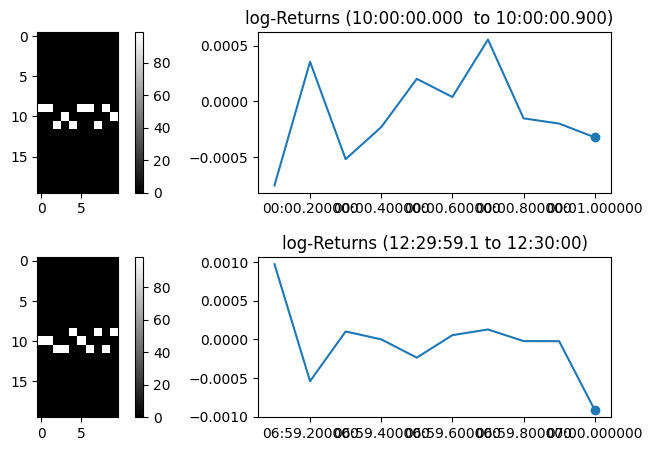

In [16]:


plt.figure(figsize=(10, 5))

plt.subplot(2,2,1)
t = 10
lookback = 10
grid= create_image_updown_price(t,lookback)
plt.imshow(grid,cmap="gray",vmin=0)
plt.colorbar()
plt.subplot(2,2,2)
plt.plot(df["Return"][t+1-lookback:t+1])
plt.scatter(df.iloc[t].name,df.iloc[t]["Return"])
plt.title("log-Returns (10:00:00.000  to 10:00:00.900)  ")

plt.subplot(2,2,3)
t = 4200
grid= create_image_updown_price(t,lookback)
plt.imshow(grid,cmap="gray",vmin=0)
plt.colorbar()
plt.subplot(2,2,4)
plt.plot(df["Return"][t+1-lookback:t+1])
plt.scatter(df.iloc[t].name,df.iloc[t]["Return"])
plt.title("log-Returns (12:29:59.1 to 12:30:00)")
plt.subplots_adjust(hspace=0.4)




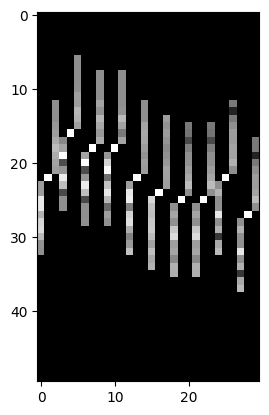

In [17]:
def create_image_updown_vol_mid(t,lookback,df):
    
    height = 50
    width = 3 * lookback # lookback = 1s
    grid = np.zeros((height,width))
    width = width + 2
    origin = df.iloc[t]["Price"]
    max_vols = np.zeros(lookback)
    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        #print(row.name)
        w_offset = width-(3*w)-1
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
        fix = (h_offset+mid)
        if fix>= height:
            fix = height - 1
        for i in range(1,11):
            ask_vol_i = row[f"Log_Ask_Volume_Level_{i}"]
            bid_vol_i = row[f"Log_Bid_Volume_Level_{i}"]
            grid[(h_offset+mid-(i)),w_offset+1] = ask_vol_i
            grid[fix+i,w_offset-1] = bid_vol_i
            largest = max(ask_vol_i,bid_vol_i)
            current = max_vols.max()
            max_vols[w-1] = max(largest,current)
    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        w_offset = width-(3*w)-1
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
        grid[h_offset+mid,w_offset] = max_vols.max()
    return grid

grid = create_image_updown_vol_mid(15,10,df)
plt.imshow(grid,cmap="grey",vmin=0)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..8.23323750070527].


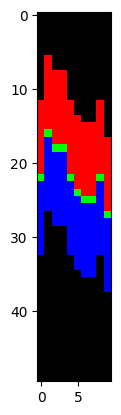

In [12]:
def create_image_updown_vol_mid_triple_l10(t,lookback):
    
    height = 50
    width = lookback # lookback = 1s
    grid = np.zeros((height,width,3))
    width = width + 2
    origin = df.iloc[t]["Price"]
    max_vols = np.zeros(lookback)
    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        #print(row.name)
        w_offset = width-w-2
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        for i in range(1,11):
            ask_vol_i = row[f"Log_Ask_Volume_Level_{i}"]
            bid_vol_i = row[f"Log_Bid_Volume_Level_{i}"]
            grid[(h_offset+mid-(i)),w_offset,0] = ask_vol_i
            grid[(h_offset+mid+(i)),w_offset,2] = bid_vol_i
            largest = max(ask_vol_i,bid_vol_i)
            current = max_vols.max()
            max_vols[w-1] = max(largest,current)
    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        w_offset = width-w-2
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
        grid[h_offset+mid,w_offset,1] = 1
    return grid

grid = create_image_updown_vol_mid_triple_l10(15,10)
plt.imshow(grid,cmap="grey",vmin=0)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..8.23323750070527].


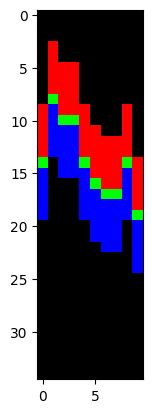

In [13]:
def create_image_updown_vol_mid_triple_l5(t,lookback):
    
    height = 35
    width = lookback # lookback = 1s
    grid = np.zeros((height,width,3))
    width = width + 2
    origin = df.iloc[t]["Price"]
    max_vols = np.zeros(lookback)
    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        #print(row.name)
        w_offset = width-w-2
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        for i in range(1,6):
            ask_vol_i = row[f"Log_Ask_Volume_Level_{i}"]
            bid_vol_i = row[f"Log_Bid_Volume_Level_{i}"]
            grid[(h_offset+mid-(i)),w_offset,0] = ask_vol_i
            grid[(h_offset+mid+(i)),w_offset,2] = bid_vol_i
            largest = max(ask_vol_i,bid_vol_i)
            current = max_vols.max()
            max_vols[w-1] = max(largest,current)
    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        w_offset = width-w-2
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
        grid[h_offset+mid,w_offset,1] = 1
    return grid

grid = create_image_updown_vol_mid_triple_l5(15,10)
plt.imshow(grid,cmap="grey",vmin=0)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..8.23323750070527].


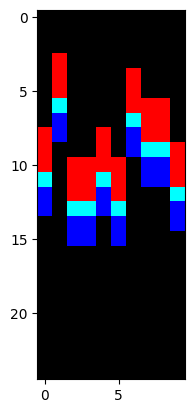

In [14]:
def create_image_updown_vol_mid_triple_l3(t,lookback,df):
    
    height = 25
    width = lookback # lookback = 1s
    grid = np.zeros((height,width,3))
    width = width + 2
    origin = df.iloc[t]["Price"]
    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        #print(row.name)
        w_offset = width-w-2
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
        for i in range(1,4):
            fix = (h_offset+mid)
            if fix>= height:
                fix = height - 1
            ask_vol_i = row[f"Log_Ask_Volume_Level_{i}"]
            bid_vol_i = row[f"Log_Bid_Volume_Level_{i}"]
            grid[(h_offset+mid-(i)),w_offset,0] = ask_vol_i
            grid[fix+i-1,w_offset,2] = bid_vol_i
    for w in range(1,lookback+1):
        row = df.iloc[t-w+1]
        w_offset = width-w-2
        direction = np.sum(df["Price_Direction"][t-w:t-w+1])
        mid = int(np.floor(height/2))+int(direction.sum())
        h_offset = int(((10000*(origin - row["Price"])/origin)+1).round(1))
        grid[h_offset+mid,w_offset,1] = 1
    return grid


grid = create_image_updown_vol_mid_triple_l3(10,10,df)
plt.imshow(grid,cmap="grey",vmin=0)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..8.23323750070527].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..8.23323750070527].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..8.23323750070527].


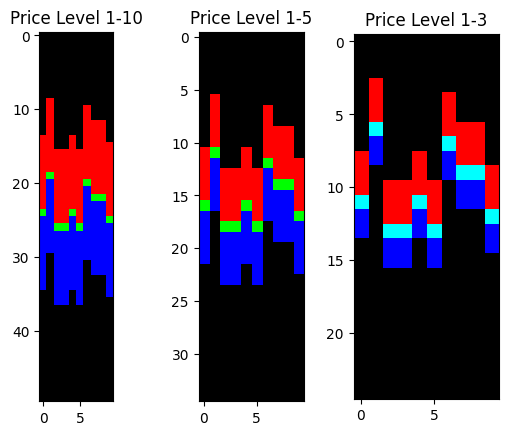

In [21]:
grid_1 = create_image_updown_vol_mid_triple_l10(10,10)
grid_2 = create_image_updown_vol_mid_triple_l5(10,10)
grid_3 = create_image_updown_vol_mid_triple_l3(10,10,df)


plt.subplot(1,3,1)
plt.title("Price Level 1-10")
plt.imshow(grid_1)
plt.subplot(1,3,2)
plt.title("Price Level 1-5")
plt.imshow(grid_2)
plt.subplot(1,3,3)
plt.title("Price Level 1-3")
plt.imshow(grid_3)

